### **Guía de Trabajo para Explorar Características de Audio con Librosa**

#### Introducción
El procesamiento de audio es una disciplina fundamental en aplicaciones como el reconocimiento de géneros musicales, comandos de voz, análisis de sentimiento en voz, entre otros. En esta guía exploraremos cómo utilizar la librería `librosa` para extraer y analizar características de audio. No se asume conocimiento previo, por lo que cada concepto será introducido de manera gradual.

#### Objetivos

1. **Comprender conceptos básicos de audio digital.** 
2. **Explorar características de señales de audio usando librosa.**
3. **Aplicar técnicas de procesamiento de audio en diferentes aplicaciones prácticas.**

[Lectura sugerida](https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html)

### Paso 1: Configuración del Entorno


Antes de comenzar, asegúrate de tener `librosa` y otras librerías necesarias instaladas en tu entorno de trabajo. Puedes instalar librosa usando pip:

debe instalar 

1. pyAudio: https://pypi.org/project/PyAudio/  
2. Librosa: https://librosa.org/doc/latest/index.html


```
pip install pyaudio
pip install librosa
```

En la carpeta hay tres archivos que debe mantener junto al código para que todo funcione de forma correcta:

```
tools.py: contiene código para realizar grabaciones y procesar el archivo de audio
wav_rw.py: contiene las funciones para lectura y escritura de audio
helpAudio.py: contiene código para convertir a formato flotante o entero cada audio que proviene de la tarjeta de sonido

```


### Paso 2: Importar Librerías

Vamos a importar las librerías necesarias para nuestro análisis.

```python

```

In [4]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

### Paso 3: Cargar y Visualizar Señales de Audio

#### Conceptos Básicos

Las señales de audio son representaciones digitales de sonido. Pueden ser de diferentes formas, pero en general se representan como una secuencia de amplitudes de sonido a lo largo del tiempo.

#### Ejemplo de Carga de Audio

Vamos a cargar un archivo de audio usando `librosa` y visualizar su forma de onda.

```python

```

La duración del audio es: 30.013333333333332 segundos
La tasa de muestreo es: 22050 Hz


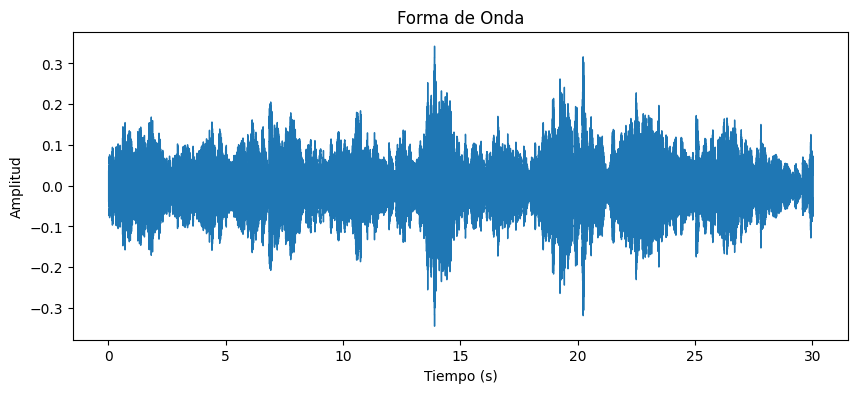

In [10]:
# Cargar un archivo de audio
audio_path = 'sampleAudio/classical/classical.00000.wav'
y, sr = librosa.load(audio_path, sr=None)

# Mostrar información básica del audio
print(f'La duración del audio es: {librosa.get_duration(y=y, sr=sr)} segundos')
print(f'La tasa de muestreo es: {sr} Hz')

# Visualizar la forma de onda
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Forma de Onda')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

### Paso 4: Extracción de Características

#### 4.1. Espectrograma

Un espectrograma es una representación del espectro de frecuencias de una señal en función del tiempo. Es fundamental para analizar las características frecuenciales del audio.


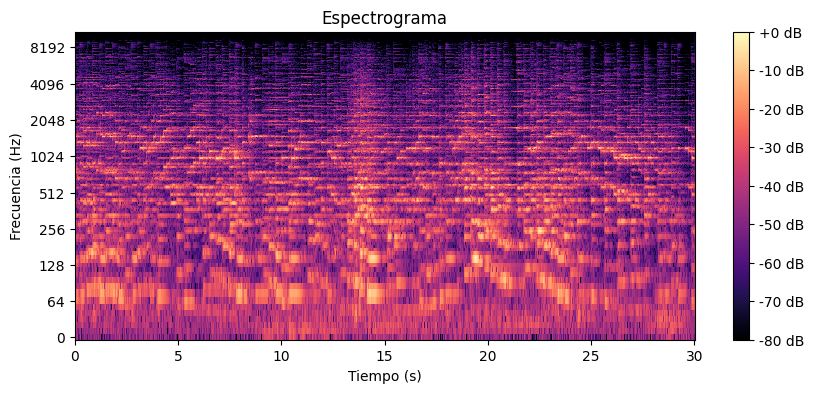

In [11]:
# Calcular el espectrograma
S = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

# Visualizar el espectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.show()

#### 4.2. MFCC (Coeficientes Cepstrales en Frecuencia Mel)

Los MFCC son una representación de audio comúnmente utilizada en el reconocimiento de patrones, incluida la voz y la música.


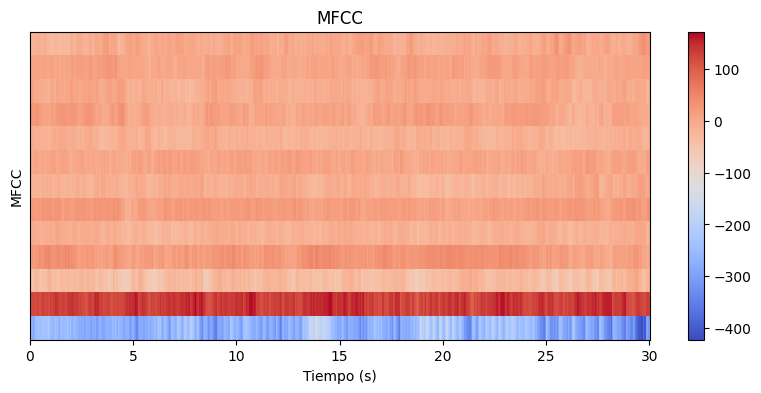

In [12]:
# Calcular los MFCC
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Visualizar los MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Tiempo (s)')
plt.ylabel('MFCC')
plt.show()

### Paso 5: Aplicaciones Prácticas

#### 5.1. Reconocimiento de Géneros Musicales

##### Preparar los Datos

Supongamos que tienes un conjunto de datos de diferentes géneros musicales:

In [14]:
import os

genres = ['classical', 'hiphop','metal']
dataset = []

for genre in genres:
    for filename in os.listdir(f'./sampleAudio/{genre}'):
        file_path = f'./sampleAudio//{genre}/{filename}'
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfccs_mean = np.mean(mfccs.T, axis=0)
        dataset.append((mfccs_mean, genre))

X, y = zip(*dataset)
X = np.array(X)
y = np.array(y)

##### Entrenar y Evaluar el Modelo

In [15]:
# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar un clasificador
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

# Evaluar el modelo
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   classical       1.00      1.00      1.00         2
      hiphop       0.50      1.00      0.67         2
       metal       1.00      0.33      0.50         3

    accuracy                           0.71         7
   macro avg       0.83      0.78      0.72         7
weighted avg       0.86      0.71      0.69         7





### Recursos Adicionales

- [Books and Courses on Digital Signal Processing](https://ocw.mit.edu/courses/6-341-discrete-time-signal-processing-fall-2005/)
- [Audio signal processing](https://www.coursera.org/learn/audio-signal-processing?)
- [base de datos completa](https://icesiedu-my.sharepoint.com/:u:/g/personal/16079220_icesi_edu_co/ES9ETWR8929BsL6bCpphbF8BpUlGjrCALxuFnd-dYiiWAA?e=FRSjoA)

## **Actividad** : Explorar otras carácterísticas, usar la base de datos completa

### 5.2. Reconocimiento de comandos  de voz

Realizar grabaciones comandos de voz a reconocer y guardar cada grupo en una carpeta diferente. Puedes iniciar con palabras sencillas cómo **Arriba** y **Abajo**.

Ejecutar el siguiente script:

In [ ]:
import numpy as np
import random
import pyaudio
from wav_rw import wavwrite
from tools import getAudio
import os
import matplotlib.pyplot as plt

#objeto de pyAudio
p             = pyaudio.PyAudio()
fs            = 16000 #Hertz
duracion      = 3#cuantos segundos por audio?
##########################################################
#### proceso para varios audios
root = "data"
N = int(input("Digite el numero del comandos a grabar (Cuantas clases diferentes): "))
for n in range(N): 
    folderClase = input(f"Digite el NOMBRE del comando numero {n+1} a grabar: ")
    if not os.path.exists(root+'/'+folderClase):
        os.makedirs(root+'/'+folderClase)
    name = folderClase.upper()   
    N_audios = int(input(f"Cuantos audios va a grabar para {name}?: "))

    folderDestino = root+'/'+folderClase + '/'


    for i in range(N_audios):
       print(f'[INFO] Grabando el audio numero {i+1}: ')    
       x=getAudio(p,RATE=fs,RECORD_SECONDS=duracion)   
       file_name = folderDestino+"/audio_" +str(i)+".wav" 
       wavwrite(x, fs, file_name)

print('[INFO] FINALIZADO EL PROCESO, SE HA GENERADO LA BASE DE DATOS')   

### 5.3. Implementar un sistema de reconocimiento para diferenciar los comandos